# K Nearest Neighbour
Thе K-Nearest Neighbors (KNN) algorithm operates on the principle of similarity, where it predicts the label or value of a new data point by considering the labels or values of its K nearest neighbors in the training dataset.
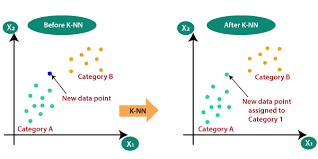

There is mainly 3 distance metrics used in knn algorithm:
- Euclidean distance:
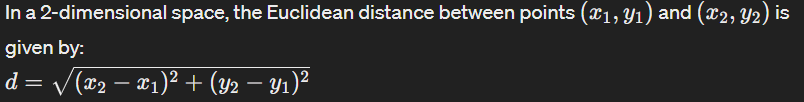

- Manhattan Distance (City Block or L1 Norm):
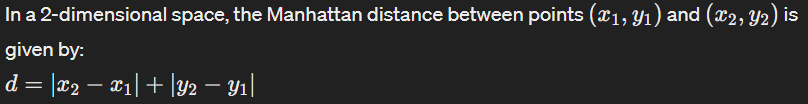

- Minkowski Distance:
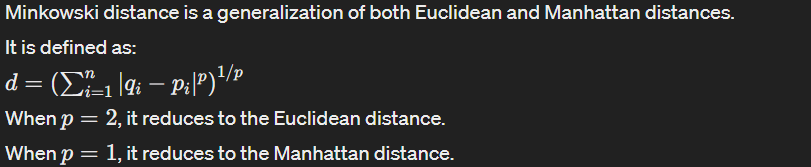

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Using k=5

In [3]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [4]:
y_pred = knn_model.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [6]:
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [7]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[38  5]
 [ 0 71]]


In [8]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## Using k=3

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn_model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [12]:
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [13]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[38  5]
 [ 3 68]]


In [14]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



# How to choose the value of k for KNN Algorithm?
- The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm. 
- The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data. 
- If the input data has more outliers or noise, a higher value of k would be better. 
- It is recommended to choose an odd value for k to avoid ties in classification. 
- Cross-validation methods can help in selecting the best k value for the given dataset.

In [15]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values
k_values = list(range(1, 21))  # Example range from 1 to 20

# Define hyperparameter grid
param_grid = {'n_neighbors': k_values}

knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)


Best k value: 9


### Lets use k=9 as it comes as the best value for k

In [16]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print()
print("Confusion Matrix:\n", conf_matrix)
print()
print("Classification Report:\n", classification_rep)

Accuracy: 0.956140350877193

Confusion Matrix:
 [[39  4]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

